# Week 10.

# Social Network Analysis

In [7]:
import networkx as nx
from networkx.algorithms import community 
from pyvis import network as net
from operator import itemgetter
import matplotlib.pyplot as plt 
%matplotlib inline

In [1]:
!pip install pyvis

     |████████████████████████████████| 592 kB 149 kB/s eta 0:00:01
  Created wheel for pyvis: filename=pyvis-0.3.0-py3-none-any.whl size=600250 sha256=f1e010b64871bc00ae77a580c018a3065f3b5acc4d40f230c22820382ee9a39c
  Stored in directory: /Users/audreychmiel/Library/Caches/pip/wheels/ec/07/ee/9d7b8d1363fb7ad9bea6b94e494b476419cf8847e56a92ec89
Successfully built pyvis


# The basics

In [16]:
G= nx.Graph()

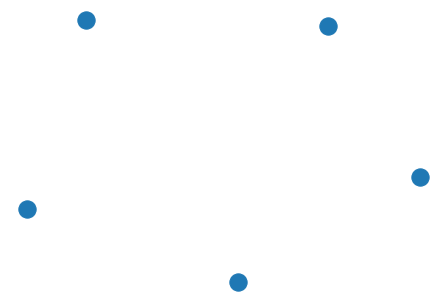

In [17]:
G.add_node(1)
G.add_nodes_from([2,3,4,5])
nx.draw(G)

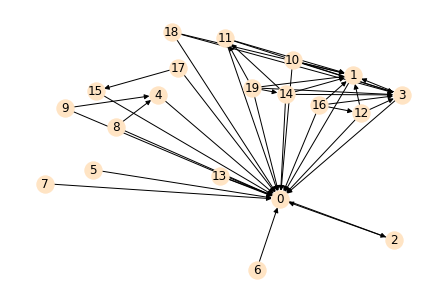

In [19]:
G= nx.gnc_graph(20)
nx.draw(G, node_color='bisque',with_labels=True)

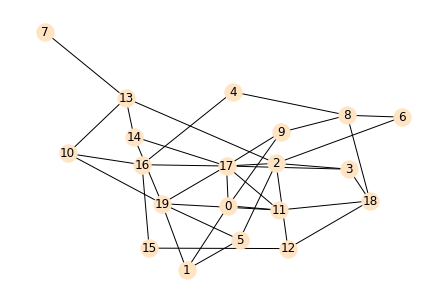

In [23]:
G= nx.gnp_random_graph(20, 0.2, directed=False) #20% of proba of nodes to be connected to one another
nx.draw(G, node_color='bisque',with_labels=True) #looks different every time we run it because random 

let's test different layouts

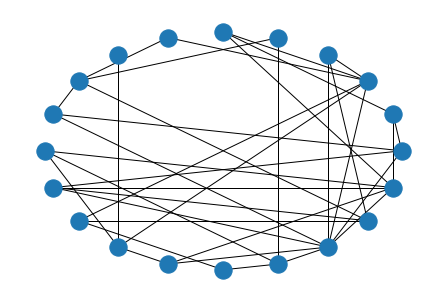

In [24]:
nx.draw_circular(G)

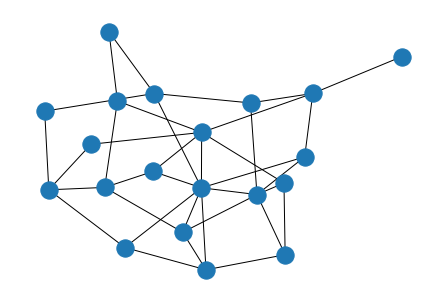

In [25]:
nx.draw_spring(G)

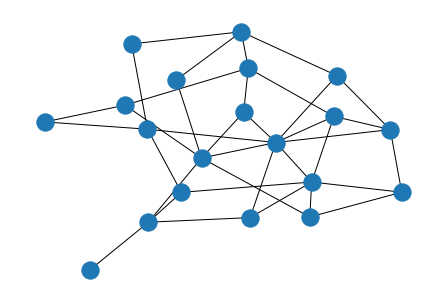

In [27]:
nx.draw_kamada_kawai(G)

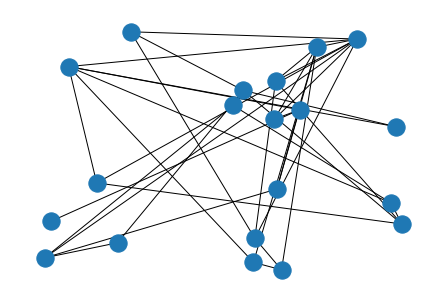

In [28]:
nx.draw_random(G)

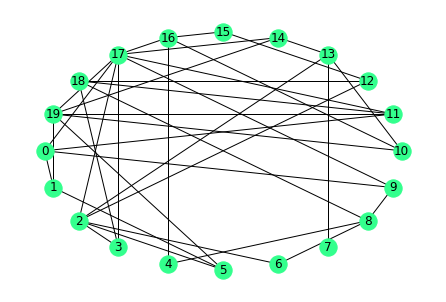

In [29]:
nx.draw_shell(G,node_color='#33FF8D', with_labels=True)

In [30]:
sum_stats=nx.info(G)
print(sum_stats)

Graph with 20 nodes and 36 edges


/var/folders/x0/1vgjq0l10m17sxsss48nrhrc0000gn/T/ipykernel_5308/2169479147.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  sum_stats=nx.info(G)


In [31]:
G.remove_node(11)

In [32]:
sum_stats=nx.info(G)
print(sum_stats)

Graph with 19 nodes and 32 edges


/var/folders/x0/1vgjq0l10m17sxsss48nrhrc0000gn/T/ipykernel_5308/2169479147.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  sum_stats=nx.info(G)


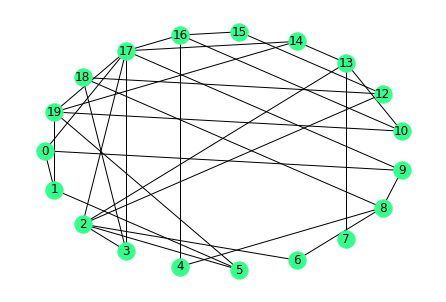

In [33]:
nx.draw_shell(G,node_color='#33FF8D', with_labels=True) #11 is gone

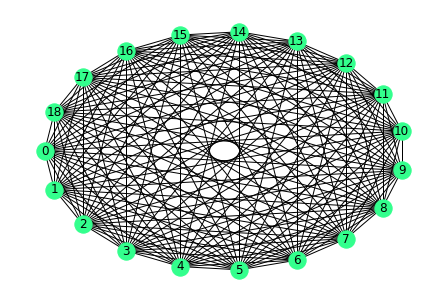

In [35]:
G= nx.complete_graph(19)
nx.draw_shell(G,node_color='#33FF8D', with_labels=True) #super dense (all connected !)

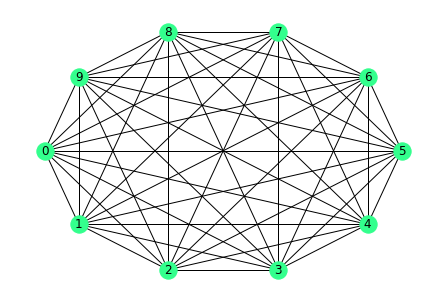

In [36]:
G= nx.complete_graph(10)
nx.draw_shell(G,node_color='#33FF8D', with_labels=True) 

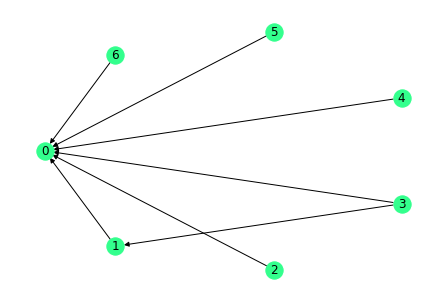

In [37]:
G= nx.gnc_graph(7)
nx.draw_shell(G,node_color='#33FF8D', with_labels=True) #super dense (all connected !)

In [38]:
labeldict = {0: 'Alice',1:'Bob',2:'Claire',3:'Dennis',4:'Esther',5:'Frank',6:'George'}

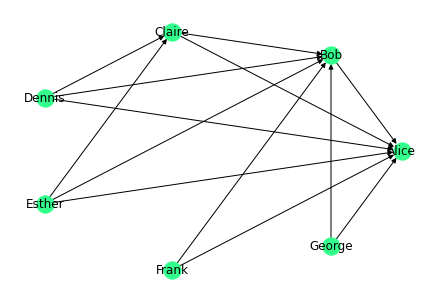

In [41]:
nx.draw_circular(G,node_color='#33FF8D', with_labels=True, labels=labeldict) 

In [43]:
G=G.to_undirected()

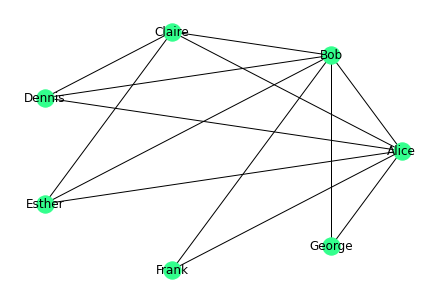

In [44]:
nx.draw_circular(G,node_color='#33FF8D', with_labels=True, labels=labeldict) 

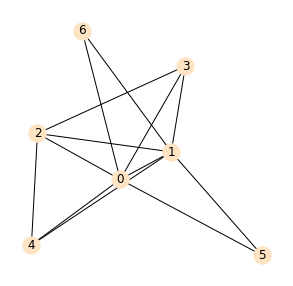

In [49]:
layout=nx.fruchterman_reingold_layout(G)
plt.figure(figsize=(5,5))
plt.axis('off')
nx.draw_networkx(G,layout, with_labels=True, node_color='bisque') 

In [50]:
nx.info(G)

/var/folders/x0/1vgjq0l10m17sxsss48nrhrc0000gn/T/ipykernel_5308/1064119803.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph with 7 nodes and 13 edges'

# Zachary's Karate Club!

In [51]:
G= nx.karate_club_graph()
print('Nodes: ', len(G.nodes()), 'Edges: ',len(G.edges()))

Nodes:  34 Edges:  78


In [52]:
G.nodes[5]['club']

'Mr. Hi'

In [53]:
nx.info(G)

/var/folders/x0/1vgjq0l10m17sxsss48nrhrc0000gn/T/ipykernel_5308/1064119803.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  nx.info(G)


'Graph named "Zachary\'s Karate Club" with 34 nodes and 78 edges'

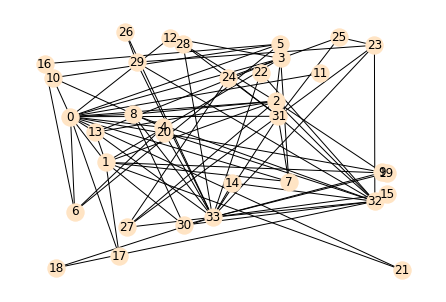

In [55]:
nx.draw_random(G,with_labels=True, node_color='bisque') 

## Let's try using pyvis

In [58]:
g=net.Network(notebook=True,cdn_resources='remote')
g.from_nx(G)
g.show_buttons(filter_=['physics'])
g.show('karate.html')

# Centrality measure

In [59]:
degree= nx.degree_centrality(G)
degree

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

In [60]:
closeness=nx.closeness_centrality(G)
closeness

{0: 0.5689655172413793,
 1: 0.4852941176470588,
 2: 0.559322033898305,
 3: 0.4647887323943662,
 4: 0.3793103448275862,
 5: 0.38372093023255816,
 6: 0.38372093023255816,
 7: 0.44,
 8: 0.515625,
 9: 0.4342105263157895,
 10: 0.3793103448275862,
 11: 0.36666666666666664,
 12: 0.3707865168539326,
 13: 0.515625,
 14: 0.3707865168539326,
 15: 0.3707865168539326,
 16: 0.28448275862068967,
 17: 0.375,
 18: 0.3707865168539326,
 19: 0.5,
 20: 0.3707865168539326,
 21: 0.375,
 22: 0.3707865168539326,
 23: 0.39285714285714285,
 24: 0.375,
 25: 0.375,
 26: 0.3626373626373626,
 27: 0.4583333333333333,
 28: 0.4520547945205479,
 29: 0.38372093023255816,
 30: 0.4583333333333333,
 31: 0.5409836065573771,
 32: 0.515625,
 33: 0.55}

In [62]:
betweenness= nx.betweenness_centrality(G)
betweenness

{0: 0.43763528138528146,
 1: 0.053936688311688304,
 2: 0.14365680615680618,
 3: 0.011909271284271283,
 4: 0.0006313131313131313,
 5: 0.02998737373737374,
 6: 0.029987373737373736,
 7: 0.0,
 8: 0.05592682780182781,
 9: 0.0008477633477633478,
 10: 0.0006313131313131313,
 11: 0.0,
 12: 0.0,
 13: 0.04586339586339586,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.03247504810004811,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.017613636363636363,
 24: 0.0022095959595959595,
 25: 0.0038404882154882154,
 26: 0.0,
 27: 0.02233345358345358,
 28: 0.0017947330447330447,
 29: 0.0029220779220779218,
 30: 0.014411976911976909,
 31: 0.13827561327561325,
 32: 0.145247113997114,
 33: 0.30407497594997596}

In [63]:
eigenvector=nx.eigenvector_centrality(G)
eigenvector

{0: 0.3554834941851943,
 1: 0.2659538704545025,
 2: 0.3171893899684447,
 3: 0.21117407832057059,
 4: 0.0759664588165738,
 5: 0.07948057788594245,
 6: 0.07948057788594245,
 7: 0.17095511498035434,
 8: 0.2274050914716605,
 9: 0.10267519030637756,
 10: 0.0759664588165738,
 11: 0.052854169452336466,
 12: 0.08425192086558085,
 13: 0.22646969838808145,
 14: 0.10140627846270832,
 15: 0.10140627846270832,
 16: 0.02363479426059687,
 17: 0.09239675666845952,
 18: 0.10140627846270832,
 19: 0.14791134007618664,
 20: 0.10140627846270832,
 21: 0.09239675666845952,
 22: 0.10140627846270832,
 23: 0.15012328691726784,
 24: 0.05705373563802805,
 25: 0.059208202502790096,
 26: 0.07558192219009324,
 27: 0.13347932684333305,
 28: 0.13107925627221215,
 29: 0.13496528673866567,
 30: 0.17476027834493085,
 31: 0.191036269797917,
 32: 0.30865104773369595,
 33: 0.373371213013235}

# Community structure

In [64]:
communities= community.greedy_modularity_communities(G)
print(communities)

[frozenset({8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}), frozenset({1, 2, 3, 7, 9, 12, 13, 17, 21}), frozenset({0, 16, 19, 4, 5, 6, 10, 11})]


In [65]:
modularity_dict={}
for i,c in enumerate(communities):
    for name in c:
        modularity_dict[name]=i #creates an entry in the dictionary to attribute the nodes: which person
        #belongs to each group 

In [66]:
modularity_dict

{8: 0,
 14: 0,
 15: 0,
 18: 0,
 20: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 1: 1,
 2: 1,
 3: 1,
 7: 1,
 9: 1,
 12: 1,
 13: 1,
 17: 1,
 21: 1,
 0: 2,
 16: 2,
 19: 2,
 4: 2,
 5: 2,
 6: 2,
 10: 2,
 11: 2}

In [67]:
nx.set_node_attributes(g, modularity_dict, 'community')

In [69]:
print(G.nodes(data=True))

[(0, {'club': 'Mr. Hi', 'size': 10}), (1, {'club': 'Mr. Hi', 'size': 10}), (2, {'club': 'Mr. Hi', 'size': 10}), (3, {'club': 'Mr. Hi', 'size': 10}), (4, {'club': 'Mr. Hi', 'size': 10}), (5, {'club': 'Mr. Hi', 'size': 10}), (6, {'club': 'Mr. Hi', 'size': 10}), (7, {'club': 'Mr. Hi', 'size': 10}), (8, {'club': 'Mr. Hi', 'size': 10}), (9, {'club': 'Officer', 'size': 10}), (10, {'club': 'Mr. Hi', 'size': 10}), (11, {'club': 'Mr. Hi', 'size': 10}), (12, {'club': 'Mr. Hi', 'size': 10}), (13, {'club': 'Mr. Hi', 'size': 10}), (14, {'club': 'Officer', 'size': 10}), (15, {'club': 'Officer', 'size': 10}), (16, {'club': 'Mr. Hi', 'size': 10}), (17, {'club': 'Mr. Hi', 'size': 10}), (18, {'club': 'Officer', 'size': 10}), (19, {'club': 'Mr. Hi', 'size': 10}), (20, {'club': 'Officer', 'size': 10}), (21, {'club': 'Mr. Hi', 'size': 10}), (22, {'club': 'Officer', 'size': 10}), (23, {'club': 'Officer', 'size': 10}), (24, {'club': 'Officer', 'size': 10}), (25, {'club': 'Officer', 'size': 10}), (26, {'club'

In [70]:
community_0= sorted(communities[0])
community_1= sorted(communities[1])
community_2= sorted(communities[2])
print(community_0)

[8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]


In [73]:
club_labels= nx.get_node_attributes(G,'club')

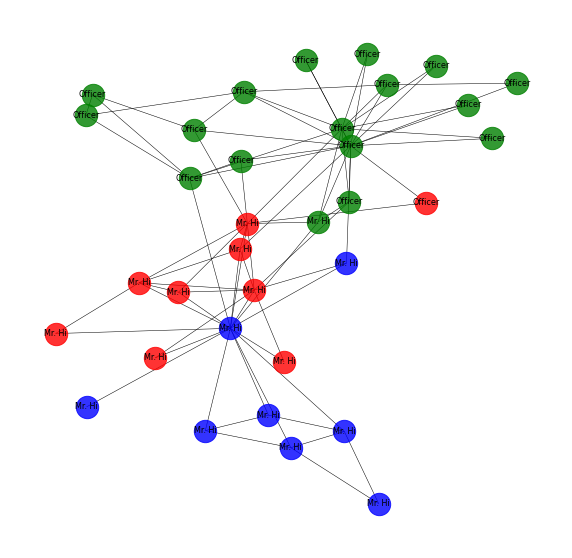

In [84]:
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos,nodelist=community_0, node_color='g', alpha=0.8, node_size=500) #alpha: transparency
nx.draw_networkx_nodes(G,pos,nodelist=community_1, node_color='r', alpha=0.8, node_size=500) 
nx.draw_networkx_nodes(G,pos,nodelist=community_2, node_color='b', alpha=0.8, node_size=500) 

nx.draw_networkx_edges(G,pos,edge_color='black', width=0.5)

nx.draw_networkx_labels(G,pos,club_labels, font_size=8)

plt.axis('off')
plt.show()

# Degree Assortativity 

In [85]:
nx.degree_assortativity_coefficient(G)

-0.47561309768461413

# work with real data

In [86]:
import pandas as pd

In [87]:
edges= pd.read_csv('quaker_edge.csv')

In [88]:
edges

,Source,Target
0,George Keith,Robert Barclay
1,George Keith,Benjamin Furly
2,George Keith,Anne Conway Viscountess Conway and Killultagh
3,George Keith,Franciscus Mercurius van Helmont
4,George Keith,William Penn
...,...,...
169,Thomas Curtis,William Simpson
170,Thomas Curtis,John Story
171,Alexander Parker,Sir Charles Wager
172,John Story,Thomas Ellwood


Now, let's check out basic information of our network

In [97]:
G=nx.Graph()
G= nx.from_pandas_edgelist(edges,source="Source",target='Target')

In [98]:
print(nx.info(G))

Graph with 119 nodes and 174 edges


/var/folders/x0/1vgjq0l10m17sxsss48nrhrc0000gn/T/ipykernel_5308/2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [108]:
nodes= pd.read_csv('quaker_node.csv')
nodes

,Name,Historical Significance,Gender,Birthdate,Deathdate,Id
0,Joseph Wyeth,religious writer,male,1663,1731,10013191
1,Alexander Skene of Newtyle,local politician and author,male,1621,1694,10011149
2,James Logan,colonial official and scholar,male,1674,1751,10007567
3,Dorcas Erbery,Quaker preacher,female,1656,1659,10003983
4,Lilias Skene,Quaker preacher and poet,male,1626,1697,10011152
...,...,...,...,...,...,...
114,Thomas Ellwood,religious controversialist,male,1639,1713,10003945
115,William Simpson,Quaker preacher,male,1627,1671,10011114
116,Samuel Bownas,Quaker minister and writer,male,1677,1753,10001390
117,John Perrot,Quaker schismatic,male,1555,1665,10009584


In [109]:
node_names= nodes['Name']
print(len(node_names))

119


In [114]:
degree=nx.degree_centrality(G)
betweenness= nx.betweenness_centrality(G)
eigenvector= nx.eigenvector_centrality(G)

In [111]:
degree

{0: 0.48484848484848486,
 1: 0.2727272727272727,
 2: 0.30303030303030304,
 3: 0.18181818181818182,
 4: 0.09090909090909091,
 5: 0.12121212121212122,
 6: 0.12121212121212122,
 7: 0.12121212121212122,
 8: 0.15151515151515152,
 9: 0.06060606060606061,
 10: 0.09090909090909091,
 11: 0.030303030303030304,
 12: 0.06060606060606061,
 13: 0.15151515151515152,
 14: 0.06060606060606061,
 15: 0.06060606060606061,
 16: 0.06060606060606061,
 17: 0.06060606060606061,
 18: 0.06060606060606061,
 19: 0.09090909090909091,
 20: 0.06060606060606061,
 21: 0.06060606060606061,
 22: 0.06060606060606061,
 23: 0.15151515151515152,
 24: 0.09090909090909091,
 25: 0.09090909090909091,
 26: 0.06060606060606061,
 27: 0.12121212121212122,
 28: 0.09090909090909091,
 29: 0.12121212121212122,
 30: 0.12121212121212122,
 31: 0.18181818181818182,
 32: 0.36363636363636365,
 33: 0.5151515151515151}

In [115]:
nodes['degree']= nodes['Name'].map(degree)
nodes['betweenness']= nodes['Name'].map(betweenness)
nodes['eigenvector']= nodes['Name'].map(eigenvector)

In [116]:
nodes

,Name,Historical Significance,Gender,Birthdate,Deathdate,Id,degree,betweenness,eigenvector
0,Joseph Wyeth,religious writer,male,1663,1731,10013191,0.008475,0.000000,2.393857e-02
1,Alexander Skene of Newtyle,local politician and author,male,1621,1694,10011149,0.008475,0.000000,8.138876e-16
2,James Logan,colonial official and scholar,male,1674,1751,10007567,0.033898,0.026945,4.447446e-02
3,Dorcas Erbery,Quaker preacher,female,1656,1659,10003983,0.008475,0.000000,4.558399e-02
4,Lilias Skene,Quaker preacher and poet,male,1626,1697,10011152,0.008475,0.000000,8.138876e-16
...,...,...,...,...,...,...,...,...,...
114,Thomas Ellwood,religious controversialist,male,1639,1713,10003945,0.067797,0.046191,1.760814e-01
115,William Simpson,Quaker preacher,male,1627,1671,10011114,0.008475,0.000000,6.314722e-03
116,Samuel Bownas,Quaker minister and writer,male,1677,1753,10001390,0.008475,0.000000,7.054780e-04
117,John Perrot,Quaker schismatic,male,1555,1665,10009584,0.059322,0.028296,1.849693e-01


In [117]:
node_attr= nodes.set_index('Name').to_dict('index')

In [118]:
node_attr

{'Joseph Wyeth': {'Historical Significance': 'religious writer',
  'Gender': 'male',
  'Birthdate': 1663,
  'Deathdate': 1731,
  'Id': 10013191,
  'degree': 0.00847457627118644,
  'betweenness': 0.0,
  'eigenvector': 0.023938569252885726},
 'Alexander Skene of Newtyle': {'Historical Significance': 'local politician and author',
  'Gender': 'male',
  'Birthdate': 1621,
  'Deathdate': 1694,
  'Id': 10011149,
  'degree': 0.00847457627118644,
  'betweenness': 0.0,
  'eigenvector': 8.138875606113619e-16},
 'James Logan': {'Historical Significance': 'colonial official and scholar',
  'Gender': 'male',
  'Birthdate': 1674,
  'Deathdate': 1751,
  'Id': 10007567,
  'degree': 0.03389830508474576,
  'betweenness': 0.026944806605823553,
  'eigenvector': 0.04447446026748654},
 'Dorcas Erbery': {'Historical Significance': 'Quaker preacher',
  'Gender': 'female',
  'Birthdate': 1656,
  'Deathdate': 1659,
  'Id': 10003983,
  'degree': 0.00847457627118644,
  'betweenness': 0.0,
  'eigenvector': 0.04558

Now that we have all centrality measures, let's incorporate into our node attribute in our network.

In [119]:
nx.set_node_attributes(G,node_attr)

In [120]:
print(G.nodes(data=True))

[('George Keith', {'Historical Significance': 'Quaker schismatic and Church of England clergyman', 'Gender': 'male', 'Birthdate': 1638, 'Deathdate': 1716, 'Id': 10006784, 'degree': 0.06779661016949153, 'betweenness': 0.04500656400917155, 'eigenvector': 0.18384690867915346}), ('Robert Barclay', {'Historical Significance': 'religious writer and colonial governor', 'Gender': 'male', 'Birthdate': 1648, 'Deathdate': 1690, 'Id': 10054848, 'degree': 0.025423728813559324, 'betweenness': 0.026944806605823553, 'eigenvector': 0.051505371504373405}), ('Benjamin Furly', {'Historical Significance': 'merchant and religious writer', 'Gender': 'male', 'Birthdate': 1636, 'Deathdate': 1714, 'Id': 10004625, 'degree': 0.0847457627118644, 'betweenness': 0.06419626175167245, 'eigenvector': 0.18785206346916503}), ('Anne Conway Viscountess Conway and Killultagh', {'Historical Significance': 'philosopher', 'Gender': 'female', 'Birthdate': 1631, 'Deathdate': 1679, 'Id': 10002755, 'degree': 0.00847457627118644, '

Who is the most influential guy? -> GEORGE FOX

In [121]:
nodes.sort_values(by='eigenvector',ascending=False) #eigenvector: most influential by nb of friends

,Name,Historical Significance,Gender,Birthdate,Deathdate,Id,degree,betweenness,eigenvector
15,George Fox,a founder of the Religious Society of Friends...,male,1624,1691,10004524,0.186441,0.236833,4.491751e-01
36,James Nayler,Quaker preacher and writer,male,1618,1660,10008713,0.135593,0.104460,3.352974e-01
106,William Penn,Quaker leader and founder of Pennsylvania,male,1644,1718,10009531,0.152542,0.239995,2.703220e-01
55,Margaret Fell,Quaker leader,female,1614,1702,10004170,0.110169,0.121068,2.531709e-01
38,George Whitehead,Quaker leader and writer,male,1637,1724,10012813,0.110169,0.126320,2.497455e-01
...,...,...,...,...,...,...,...,...,...
81,Sarah Gibbons,Quaker preacher in America,female,1634,1659,10004811,0.008475,0.000000,8.138876e-16
28,John Freame,banker and lobbyist,male,1665,1745,10004564,0.008475,0.000000,8.138876e-16
92,John Rous,Quaker missionary,male,1585,1695,10010488,0.008475,0.000000,8.138876e-16
83,Humphrey Norton,Quaker missionary and author,male,1655,1660,10008917,0.008475,0.000000,8.138876e-16


How assortative is the network?

In [123]:
nx.degree_assortativity_coefficient(G) #not really assortative

-0.02863458018793503

You can also calculate assortativity coefficient for node attributes

In [125]:
nx.attribute_assortativity_coefficient(G,'Gender') #it tends to be more assortative taking gender into consideration

0.1882377889305155

# Done!